In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import gdown
import rarfile
import os

# Correct URL after permissions are updated
url = 'https://drive.google.com/uc?id=1aHffnm3eqz18GCVI_ggxywD9vosITAqR'
output_rar = '/content/Wheat1.rar'

# Download the RAR file
gdown.download(url, output_rar, quiet=False)

# Check if the downloaded file is valid before extracting
if os.path.exists(output_rar):
    try:
        # Try to open the downloaded file as a RAR file
        with rarfile.RarFile(output_rar, 'r') as rar_ref:
            rar_ref.extractall('/content')
        print("File extracted successfully!")
    except rarfile.NotRarFile:
        print("Error: The downloaded file is not a valid RAR archive.")
else:
    print("Error: File not found.")


Downloading...
From (original): https://drive.google.com/uc?id=1aHffnm3eqz18GCVI_ggxywD9vosITAqR
From (redirected): https://drive.google.com/uc?id=1aHffnm3eqz18GCVI_ggxywD9vosITAqR&confirm=t&uuid=a8c831fc-b159-4bd6-bda0-4a4fed3f3c68
To: /content/Wheat1.rar
100%|██████████| 224M/224M [00:12<00:00, 17.9MB/s]


File extracted successfully!


In [4]:
# Path to the extracted dataset folder

dataset = '/content/Wheat'

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,911,210 (91.21 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Found 1685 images belonging to 3 classes.
Found 245 images belonging to 3 classes.
Found 491 images belonging to 3 classes.
Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 432ms/step - accuracy: 0.6139 - loss: 0.9253 - val_accuracy: 0.9061 - val_loss: 0.2994
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8890 - loss: 0.3173 - val_accuracy: 0.8898 - val_loss: 0.2796
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.9263 - loss: 0.2267 - val_accuracy: 0.9061 - val_loss: 0.2469
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.9307 - loss: 0.2050 - val_accuracy: 0.9347 - val_loss: 0.2019
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.9621 - loss: 0.1456 - val_accuracy: 0.9224 - val_loss: 0.1979
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9571 - loss: 0.1378 - val_accuracy: 0.9061 - val_loss: 0.2621
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.9736 - loss: 0.1078 - val_accuracy: 0.

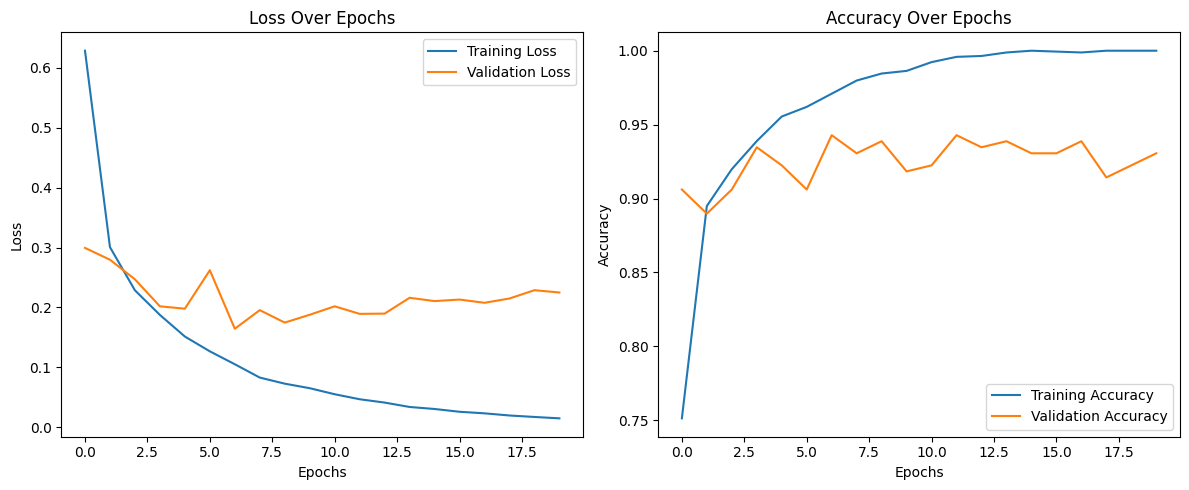

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 644ms/step

Performance on Test Data
Precision: 0.9274366140570954
Recall: 0.9266802443991853
F1 Score: 0.9266570188063363
Accuracy: 0.9266802443991853
Confusion Matrix:
              Brown_Rust  Healthy  Yellow_Rust
Brown_Rust          160        7            7
Healthy               4      137            2
Yellow_Rust           8        8          158


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Directory for the dataset
data_dir = dataset

# Load InceptionV3 with pre-trained ImageNet weights, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model to prevent training them
base_model.trainable = False

# Add custom layers on top of the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='swish')(x)  # Changed activation to 'swish'
outputs = Dense(10, activation='softmax')(x)  # Adjust the number of classes as needed

# Create the model
model = Model(inputs, outputs)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Brown_Rust', 'Healthy', 'Yellow_Rust'], title="Performance on Test Data")
